In [1]:
import pandas as pd
import numpy as np

datavacc = pd.read_csv("dataset-ca.csv", sep=";", encoding="latin-1")
# melihat data
datavacc.head(5)

,judul,isi berita,berita-merge,tanggal,Kategori Sumber,link,label
0,Daftar Vaksin COVID-19 Yang Digunakan di Indon...,Dalam pelaksanaan program vaksinasi COVID-19 d...,Daftar Vaksin COVID-19 Yang Digunakan di Indon...,01/01/2020,Website Covid19.co.id,https://covid19.go.id/tentang-vaksin-covid19,0
1,Ulama Aceh Haramkan Vaksin Covid-19,vaksin Covid-19Klaim ulama Aceh mengharamkan v...,Ulama Aceh Haramkan Vaksin Covid-19 vaksin Cov...,12/01/2020,antaranews.com,https://news.detik.com/berita/d-5330901/mui-ny...,1
2,China Akui Dokter Palestina Penemu Vaksin Coro...,Palestina dan negara-negara di Arab lainnya be...,China Akui Dokter Palestina Penemu Vaksin Coro...,16/03/2020,Website Asianmuslim.com,https://perma.cc/7URY-9N2U,1
3,Donald Trump Umumkan Roche Medical Company aka...,Hasil Periksa Fakta Riski Maulana (Anggota Kom...,Donald Trump Umumkan Roche Medical Company aka...,19/03/2020,Facebook dan Twitter,https://twitter.com/mbah_mijan/status/12398473...,1
4,Kemenristek BRIN: Pengembangan Vaksin Corona M...,JAKARTA  Pemerintah Indonesia melalui Kemente...,Kemenristek BRIN: Pengembangan Vaksin Corona M...,06/04/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/04/06/kemen...,0


In [2]:
datavacc.shape

(1453, 7)

In [3]:
datavacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   judul            1453 non-null   object
 1   isi berita       1453 non-null   object
 2   berita-merge     1453 non-null   object
 3   tanggal          1453 non-null   object
 4   Kategori Sumber  1453 non-null   object
 5   link             1453 non-null   object
 6   label            1453 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 79.6+ KB


In [4]:
display("Data ",datavacc.describe())

'Data '

,label
count,1453.000000
mean,0.306951
std,0.461388
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Check Missing Values

In [5]:
# mengecek data nan
def null_table(datavacc):
#     print("Test Data Frame")
    print(pd.isnull(datavacc).sum())

null_table(datavacc)

judul              0
isi berita         0
berita-merge       0
tanggal            0
Kategori Sumber    0
link               0
label              0
dtype: int64


Check Duplicate

In [6]:
print("Data :",datavacc.duplicated().sum())

Data : 0


ANALISIS DEKSKRIPTIF

In [7]:
# melihat banyak nya jumlah judul berita HOAX = 1 dan berita SALAH = 0
datavacc['label'].value_counts()

0    1007
1     446
Name: label, dtype: int64

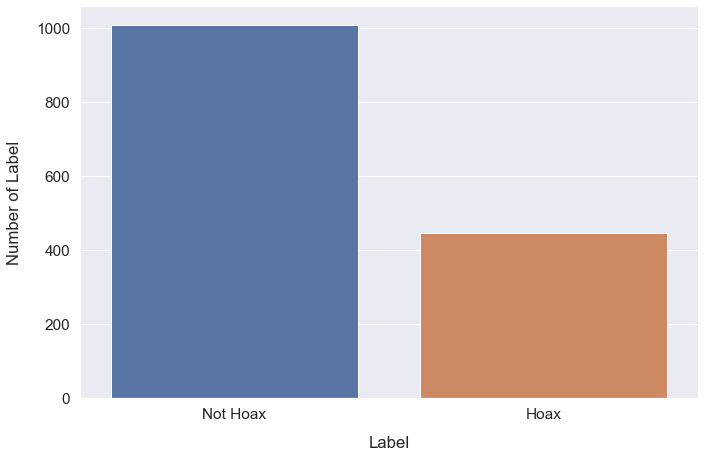

In [8]:
import matplotlib.pyplot as plt
# _, ax1 = plt.subplots(figsize=(6,5))
# stars_histogram = datavacc['label'].value_counts().sort_index()
# stars_histogram.plot(kind='bar', width=0.7, color='cyan')
# plt.xlabel('label')
# plt.ylabel('jumlah judul')

# plt.tight_layout()
# plt.show

import seaborn as sns
sns.set(font_scale=1.4)
g = sns.catplot(x='label', kind='count', data=datavacc, height=6.27, aspect=9.7/6.27)
g.set_xticklabels(['Not Hoax', 'Hoax'])
plt.xlabel("Label", labelpad=14)
plt.ylabel("Number of Label", labelpad=14)
plt.show()

In [9]:
# menghapus baris jika ada data kosong
datavacc= datavacc.dropna()
datavacc.shape

(1453, 7)

In [10]:
datavacc_fil = datavacc[['berita-merge', 'tanggal', 'Kategori Sumber', 'link', 'label']]
datavacc_fil

,berita-merge,tanggal,Kategori Sumber,link,label
0,Daftar Vaksin COVID-19 Yang Digunakan di Indon...,01/01/2020,Website Covid19.co.id,https://covid19.go.id/tentang-vaksin-covid19,0
1,Ulama Aceh Haramkan Vaksin Covid-19 vaksin Cov...,12/01/2020,antaranews.com,https://news.detik.com/berita/d-5330901/mui-ny...,1
2,China Akui Dokter Palestina Penemu Vaksin Coro...,16/03/2020,Website Asianmuslim.com,https://perma.cc/7URY-9N2U,1
3,Donald Trump Umumkan Roche Medical Company aka...,19/03/2020,Facebook dan Twitter,https://twitter.com/mbah_mijan/status/12398473...,1
4,Kemenristek BRIN: Pengembangan Vaksin Corona M...,06/04/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/04/06/kemen...,0
...,...,...,...,...,...
1448,Bill Gates akan Menarik Semua Peredaran Vaksin...,23/01/2022,Pesan Whatsapp,https://archive.ph/fcerl,1
1449,Data Vaksinasi COVID-19 (Update per 5Â Februar...,05/02/2022,Website Covid19.co.id,https://covid19.go.id/p/berita/data-vaksinasi-...,0
1450,Badan POM Terbitkan Izin Penggunaan Darurat (E...,06/02/2022,Website Covid19.co.id,https://covid19.go.id/artikel/2022/02/06/bpom-...,0
1451,Pidato Henry Kissinger Sebut Vaksin adalah Al...,13/02/2022,Facebook,https://m.facebook.com/story.php?story_fbid=24...,1


CASE FOLDING

In [11]:
# Mengubah semua huruf kapital menjadi huruf kecil atau lower text

datavacc_fil['berita-merge'] = datavacc['berita-merge'].str.lower()
datavacc_fil.head(10)

c:\Users\DelvanitaSW\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,berita-merge,tanggal,Kategori Sumber,link,label
0,daftar vaksin covid-19 yang digunakan di indon...,01/01/2020,Website Covid19.co.id,https://covid19.go.id/tentang-vaksin-covid19,0
1,ulama aceh haramkan vaksin covid-19 vaksin cov...,12/01/2020,antaranews.com,https://news.detik.com/berita/d-5330901/mui-ny...,1
2,china akui dokter palestina penemu vaksin coro...,16/03/2020,Website Asianmuslim.com,https://perma.cc/7URY-9N2U,1
3,donald trump umumkan roche medical company aka...,19/03/2020,Facebook dan Twitter,https://twitter.com/mbah_mijan/status/12398473...,1
4,kemenristek brin: pengembangan vaksin corona m...,06/04/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/04/06/kemen...,0
5,elisa granato kelinci percobaan vaksin kopit d...,01/05/2020,Facebook,https://fb.com/abufaiqa.hamdashakia,1
6,"tentang virus, antivirus, vaksin, dan genome t...",12/05/2020,Website Covid19.co.id,https://covid19.go.id/edukasi/masyarakat-umum/...,0
7,"belum ada vaksin, terapi plasma konvalesen jad...",26/06/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/06/26/belum...,0
8,konsorsium riset dan inovasi covid-19 kemenris...,04/07/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/07/04/konso...,0
9,"vaksin covid-19 belum ditemukan, lindungi diri...",07/07/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/07/07/vaksi...,0


In [12]:
datavacc_fil.to_csv("CaseFolding-merge.csv", index=False)

CLEANSING

In [13]:
# pembersihan text dari tab, new line, back slice, mention, link, hastag dan URL

import string
# regex library
import re 

def clean_text(text):
    # menghapus newline, tab dan back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ")
    # menghapus non ASCII (emoticon, chiness word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hastag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\s+)"," ", text).split())
    # menghapus incomplete URL
    return text.replace("htpp://", " ").replace("htpps://"," ")

datavacc_fil['berita-merge'] = datavacc_fil['berita-merge'].apply(clean_text)
datavacc_fil.head(10)

c:\Users\DelvanitaSW\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,berita-merge,tanggal,Kategori Sumber,link,label
0,daftar vaksin covid-19 yang digunakan di indon...,01/01/2020,Website Covid19.co.id,https://covid19.go.id/tentang-vaksin-covid19,0
1,ulama aceh haramkan vaksin covid-19 vaksin cov...,12/01/2020,antaranews.com,https://news.detik.com/berita/d-5330901/mui-ny...,1
2,china akui dokter palestina penemu vaksin coro...,16/03/2020,Website Asianmuslim.com,https://perma.cc/7URY-9N2U,1
3,donald trump umumkan roche medical company aka...,19/03/2020,Facebook dan Twitter,https://twitter.com/mbah_mijan/status/12398473...,1
4,kemenristek brin: pengembangan vaksin corona m...,06/04/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/04/06/kemen...,0
5,elisa granato kelinci percobaan vaksin kopit d...,01/05/2020,Facebook,https://fb.com/abufaiqa.hamdashakia,1
6,"tentang virus, antivirus, vaksin, dan genome t...",12/05/2020,Website Covid19.co.id,https://covid19.go.id/edukasi/masyarakat-umum/...,0
7,"belum ada vaksin, terapi plasma konvalesen jad...",26/06/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/06/26/belum...,0
8,konsorsium riset dan inovasi covid-19 kemenris...,04/07/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/07/04/konso...,0
9,"vaksin covid-19 belum ditemukan, lindungi diri...",07/07/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/07/07/vaksi...,0


In [14]:
datavacc_fil.to_csv("Cleansing-merge.csv", index=False)

In [15]:
# Remove Number

def remove_number(text):
    return re.sub(r"\d+", "", text)

datavacc_fil['berita-merge'] = datavacc_fil['berita-merge'].apply(remove_number)
datavacc_fil.head(10)

c:\Users\DelvanitaSW\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,berita-merge,tanggal,Kategori Sumber,link,label
0,daftar vaksin covid- yang digunakan di indones...,01/01/2020,Website Covid19.co.id,https://covid19.go.id/tentang-vaksin-covid19,0
1,ulama aceh haramkan vaksin covid- vaksin covid...,12/01/2020,antaranews.com,https://news.detik.com/berita/d-5330901/mui-ny...,1
2,china akui dokter palestina penemu vaksin coro...,16/03/2020,Website Asianmuslim.com,https://perma.cc/7URY-9N2U,1
3,donald trump umumkan roche medical company aka...,19/03/2020,Facebook dan Twitter,https://twitter.com/mbah_mijan/status/12398473...,1
4,kemenristek brin: pengembangan vaksin corona m...,06/04/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/04/06/kemen...,0
5,elisa granato kelinci percobaan vaksin kopit d...,01/05/2020,Facebook,https://fb.com/abufaiqa.hamdashakia,1
6,"tentang virus, antivirus, vaksin, dan genome t...",12/05/2020,Website Covid19.co.id,https://covid19.go.id/edukasi/masyarakat-umum/...,0
7,"belum ada vaksin, terapi plasma konvalesen jad...",26/06/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/06/26/belum...,0
8,konsorsium riset dan inovasi covid- kemenriste...,04/07/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/07/04/konso...,0
9,"vaksin covid- belum ditemukan, lindungi diri d...",07/07/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/07/07/vaksi...,0


In [16]:
datavacc_fil.to_csv("RemoveNumber-merge.csv", index=False)

In [17]:
# Remove Punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans("","", string.punctuation))

datavacc_fil['berita-merge'] = datavacc_fil['berita-merge'].apply(remove_punctuation)
datavacc_fil.head(5)

c:\Users\DelvanitaSW\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,berita-merge,tanggal,Kategori Sumber,link,label
0,daftar vaksin covid yang digunakan di indonesi...,01/01/2020,Website Covid19.co.id,https://covid19.go.id/tentang-vaksin-covid19,0
1,ulama aceh haramkan vaksin covid vaksin covidk...,12/01/2020,antaranews.com,https://news.detik.com/berita/d-5330901/mui-ny...,1
2,china akui dokter palestina penemu vaksin coro...,16/03/2020,Website Asianmuslim.com,https://perma.cc/7URY-9N2U,1
3,donald trump umumkan roche medical company aka...,19/03/2020,Facebook dan Twitter,https://twitter.com/mbah_mijan/status/12398473...,1
4,kemenristek brin pengembangan vaksin corona mi...,06/04/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/04/06/kemen...,0


In [18]:
datavacc_fil.to_csv("RemovePunctuation-merge.csv", index=False)

In [19]:
# Remove Single Char

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b","", text)

datavacc_fil['berita-merge'] = datavacc_fil['berita-merge'].apply(remove_single_char)
datavacc_fil.head(5)

c:\Users\DelvanitaSW\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,berita-merge,tanggal,Kategori Sumber,link,label
0,daftar vaksin covid yang digunakan di indonesi...,01/01/2020,Website Covid19.co.id,https://covid19.go.id/tentang-vaksin-covid19,0
1,ulama aceh haramkan vaksin covid vaksin covidk...,12/01/2020,antaranews.com,https://news.detik.com/berita/d-5330901/mui-ny...,1
2,china akui dokter palestina penemu vaksin coro...,16/03/2020,Website Asianmuslim.com,https://perma.cc/7URY-9N2U,1
3,donald trump umumkan roche medical company aka...,19/03/2020,Facebook dan Twitter,https://twitter.com/mbah_mijan/status/12398473...,1
4,kemenristek brin pengembangan vaksin corona mi...,06/04/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/04/06/kemen...,0


In [20]:
datavacc_fil.to_csv("SingleChar-merge.csv", index=False)

TOKENIZING

In [21]:
#pemisahan teks menjadi potongan kata
 
from nltk.tokenize import word_tokenize
import nltk

# NLTK word token
def tokenz(text):
    token = nltk.word_tokenize(text)
    return token

datavacc_fil['berita-merge'] = datavacc_fil['berita-merge'].apply(tokenz) 
datavacc_fil.head(5)

c:\Users\DelvanitaSW\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,berita-merge,tanggal,Kategori Sumber,link,label
0,"[daftar, vaksin, covid, yang, digunakan, di, i...",01/01/2020,Website Covid19.co.id,https://covid19.go.id/tentang-vaksin-covid19,0
1,"[ulama, aceh, haramkan, vaksin, covid, vaksin,...",12/01/2020,antaranews.com,https://news.detik.com/berita/d-5330901/mui-ny...,1
2,"[china, akui, dokter, palestina, penemu, vaksi...",16/03/2020,Website Asianmuslim.com,https://perma.cc/7URY-9N2U,1
3,"[donald, trump, umumkan, roche, medical, compa...",19/03/2020,Facebook dan Twitter,https://twitter.com/mbah_mijan/status/12398473...,1
4,"[kemenristek, brin, pengembangan, vaksin, coro...",06/04/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/04/06/kemen...,0


In [22]:
datavacc_fil.to_csv("Tokenizing-merge.csv", index=False)

SPELL NORMALIZATION

In [23]:
# penyeragaman kata yang memiliki makna yang sama namun penulisan yang berbeda

normalizad_word = pd.read_excel("normalisasi.xlsx")
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(doc):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in doc]

datavacc_fil['berita-merge'] = datavacc_fil['berita-merge'].apply(normalized_term) 
datavacc_fil.head(5)

c:\Users\DelvanitaSW\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,berita-merge,tanggal,Kategori Sumber,link,label
0,"[daftar, vaksin, covid, yang, digunakan, di, i...",01/01/2020,Website Covid19.co.id,https://covid19.go.id/tentang-vaksin-covid19,0
1,"[ulama, aceh, haramkan, vaksin, covid, vaksin,...",12/01/2020,antaranews.com,https://news.detik.com/berita/d-5330901/mui-ny...,1
2,"[china, akui, dokter, palestina, penemu, vaksi...",16/03/2020,Website Asianmuslim.com,https://perma.cc/7URY-9N2U,1
3,"[donald, trump, umumkan, roche, medical, compa...",19/03/2020,Facebook dan Twitter,https://twitter.com/mbah_mijan/status/12398473...,1
4,"[kemenristek, brin, pengembangan, vaksin, coro...",06/04/2020,Website Covid19.co.id,https://covid19.go.id/artikel/2020/04/06/kemen...,0


In [24]:
datavacc_fil.to_csv("Normalisasi-merge.csv", index=False)

STOPWORD REMOVAL

In [26]:
from nltk.corpus import stopwords


#get stopword indonesia
list_stopwords = stopwords.words('indonesian')
# read data stopword tambahan from csv
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# konversi kata stopword dari file csv ke list
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# mengakhiri list ke dictionary
list_stopwords = set(list_stopwords)

# fungsi untuk menghapus stopword
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

datavacc_fil['berita-merge'] = datavacc_fil['berita-merge'].apply(stopwords_removal) 
datavacc_fil.head(2)

c:\Users\DelvanitaSW\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,berita-merge,tanggal,Kategori Sumber,link,label
0,"[daftar, vaksin, covid, indonesia, pelaksanaan...",01/01/2020,Website Covid19.co.id,https://covid19.go.id/tentang-vaksin-covid19,0
1,"[ulama, aceh, haramkan, vaksin, covid, vaksin,...",12/01/2020,antaranews.com,https://news.detik.com/berita/d-5330901/mui-ny...,1


In [27]:
datavacc_fil.to_csv("StopwordRemoval-merge.csv", index=False)

STEMMING

In [28]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in datavacc_fil['berita-merge']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

datavacc_fil['berita-merge'] = datavacc_fil['berita-merge'].swifter.apply(get_stemmed_term)

15038
------------------------
daftar : daftar
vaksin : vaksin
covid : covid
indonesia : indonesia
pelaksanaan : laksana
program : program
vaksinasi : vaksinasi
pemerintah : perintah
mengupayakan : upaya
ketersediaan : sedia
terpenuhi : penuh
penduduk : duduk
tercapainya : capa
kekebalan : kebal
kelompok : kelompok
upayaupaya : upayaupaya
pengadaan : ada
perjanjian : janji
bilateral : bilateral
multilateral : multilateral
covax : covax
facility : facility
gavi : gavi
who : who
donasi : donasi
negaranegara : negaranegara
sahabat : sahabat
badan : badan
pengawas : awas
obat : obat
makanan : makan
izin : izin
penggunaan : guna
darurat : darurat
jenis : jenis
sinovac : sinovac
astrazeneca : astrazeneca
sinopharm : sinopharm
moderna : moderna
pfizer : pfizer
novavax : novavax
sputnikv : sputnikv
janssen : janssen
convidencia : convidencia
zifivax : zifivax
masingmasing : masingmasing
memiliki : milik
mekanisme : mekanisme
pemberiannya : beri
dosis : dosis
interval : interval
pemberian : ber

Pandas Apply: 100%|██████████| 1453/1453 [00:01<00:00, 1154.35it/s]
c:\Users\DelvanitaSW\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [29]:
datavacc_fil.to_csv("Stemming-merge.csv", index=False)

RANDOM FOREST

In [18]:
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import gensim
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [19]:
list_accuracy, list_precision, list_recall, list_f1 = [], [], [], []

In [20]:
#split data use ratio 80:20

for i in range(5):
    # split dataset
    train, test = train_test_split(datavacc, test_size=0.2)

    # model gensim word2vec
    w2v_model = gensim.models.Word2Vec(train['berita-merge'], vector_size=100, window=5, min_count=2) 

    # display word vectors for each word in the sentence
    words = set(w2v_model.wv.index_to_key)
    x_train_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in train['berita-merge']]), dtype='object')

    x_test_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in test['berita-merge']]), dtype='object')


    # calculate the sentence vector by averaging the word vector in the sentence
    x_train_vect_avg = []
    for v in x_train_vect:
        if v.size:
            x_train_vect_avg.append(v.mean(axis=0))
            
        else:
            x_train_vect_avg.append(np.zeros(100, dtype=float))

    x_test_vect_avg = []
    for v in x_test_vect:
        if v.size:
            x_test_vect_avg.append(v.mean(axis=0))
        else:
            x_test_vect_avg.append(np.zeros(100, dtype=float))

    # length of train and test average vector
    print(len(x_train_vect_avg), len(x_test_vect_avg))

    x_train_vect_avg = pd.DataFrame(x_train_vect_avg)

    x_test_vect_avg = pd.DataFrame(x_test_vect_avg)

    y_train = train['label']
    y_test = test['label']

    # instantiating the random over sampler 
    ros = RandomOverSampler()
    # resampling X, y
    x_train_ros, y_train_ros = ros.fit_resample(x_train_vect_avg, y_train)
    # new class distribution 
    print(Counter(y_train_ros))

    
    # grid parameters for random forest
    parameters = {
        'n_estimators' : [50, 75, 100], 
        'min_samples_leaf' : [1, 2, 4],
        'min_samples_split' : [2, 5, 10]
    }

    # k-fold method cross validation
    kf=KFold(n_splits=5, shuffle=False) 
    model_rf = RandomForestClassifier(random_state=49)
    clf = GridSearchCV(model_rf,                    # model
                    param_grid = parameters,   # hyperparameters
                    scoring='accuracy',        # metric for scoring
                    cv=kf)                     # number of folds

    # train model
    clf.fit(x_train_ros,y_train_ros)
    
    print("Tuned Hyperparameters :", clf.best_params_)
    print("Best Accuracy :",clf.best_score_)

    # looking for the best parameters
    best_parameters = clf.best_params_

    # classification RF
    y_pred_rf = clf.predict(x_test_vect_avg)
    presisi = precision_score(y_test, y_pred_rf) 
    recall = recall_score(y_test, y_pred_rf) 
    accuracy = accuracy_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf)
    print('Precision Test: {} / Recall Test: {} / Accuracy Test: {} / F1 Test: {}'.format( 
        round(presisi, 4), round(recall, 4), round(accuracy, 4), round(f1, 4)))

    # list of evaluation metric values
    list_accuracy.append(accuracy)
    list_precision.append(presisi)
    list_recall.append(recall)
    list_f1.append(f1)

1162 291
Counter({0: 836, 1: 836})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy : 0.9420091160961659
Precision Test: 0.8679 / Recall Test: 0.7667 / Accuracy Test: 0.8557 / F1 Test: 0.8142
1162 291
Counter({0: 803, 1: 803})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy : 0.9395986919757744
Precision Test: 0.7865 / Recall Test: 0.8046 / Accuracy Test: 0.8763 / F1 Test: 0.7955
1162 291
Counter({1: 802, 0: 802})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy : 0.9420560747663551
Precision Test: 0.7423 / Recall Test: 0.8372 / Accuracy Test: 0.866 / F1 Test: 0.7869
1162 291
Counter({0: 808, 1: 808})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 75}
Best Accuracy : 0.9498929786339488
Precision Test: 0.8 / Recall Test: 0.7391 / Accuracy Test: 0.8591 / F1 Test: 0.7684
1162 29

In [21]:
print(list_accuracy, np.mean(list_accuracy)) 
print(list_precision, np.mean(list_precision))
print(list_recall, np.mean(list_recall))
print(list_f1, np.mean(list_f1))

[0.8556701030927835, 0.8762886597938144, 0.865979381443299, 0.8591065292096219, 0.8865979381443299] 0.8687285223367699
[0.8679245283018868, 0.7865168539325843, 0.7422680412371134, 0.8, 0.8554216867469879] 0.8104262220437144
[0.7666666666666667, 0.8045977011494253, 0.8372093023255814, 0.7391304347826086, 0.7717391304347826] 0.7838686470718129
[0.8141592920353983, 0.7954545454545455, 0.7868852459016393, 0.768361581920904, 0.8114285714285713] 0.7952578473482117


ADABOOST

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [23]:
list_accuracy_Adb, list_precision_Adb, list_recall_Adb, list_f1_Adb = [], [], [], []

In [24]:
for i in range(5):
    # split dataset
    train, test = train_test_split(datavacc, test_size=0.2)

     # model gensim word2vec
    w2v_model = gensim.models.Word2Vec(train['berita-merge'], vector_size=100, window=5, min_count=2)

   # display word vectors for each word in the sentence
    words = set(w2v_model.wv.index_to_key)
    x_train_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in train['berita-merge']]), dtype='object')

    x_test_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in test['berita-merge']]), dtype='object')

    # calculate the sentence vector by averaging the word vector in the sentence
    x_train_vect_avg = []
    for v in x_train_vect:
        if v.size:
            x_train_vect_avg.append(v.mean(axis=0))
            
        else:
            x_train_vect_avg.append(np.zeros(100, dtype=float))

    x_test_vect_avg = []
    for v in x_test_vect:
        if v.size:
            x_test_vect_avg.append(v.mean(axis=0))
        else:
            x_test_vect_avg.append(np.zeros(100, dtype=float))


    # length of train and test average vector
    print(len(x_train_vect_avg), len(x_test_vect_avg))

    x_train_vect_avg = pd.DataFrame(x_train_vect_avg)

    x_test_vect_avg = pd.DataFrame(x_test_vect_avg)

    y_train = train['label']
    y_test = test['label']

    # instantiating the random over sampler 
    ros = RandomOverSampler()
    # resampling X, y
    x_train_ros, y_train_ros = ros.fit_resample(x_train_vect_avg, y_train)
    # new class distribution 
    print(Counter(y_train_ros))

    
    # parameter grid for Adaboost
    parameters = {
        'n_estimators' : [100, 150],
        'learning_rate' : [0.5, 0.01, 0.2, 0.3, 0.4]
    }

    # k-fold method cross validation
    kf=KFold(n_splits=5, shuffle=False) 
    model_adaboost = AdaBoostClassifier(random_state=49)
    clfdaboost = GridSearchCV(model_adaboost,                    # model
                    param_grid = parameters,   # hyperparameters
                    scoring='accuracy',        # metric for scoring
                    cv=kf)                     # number of folds

    # train model
    clfdaboost.fit(x_train_ros,y_train_ros)
    
    print("Tuned Hyperparameters adaboost:", clfdaboost.best_params_)
    print("Best Accuracy adaboost :",clfdaboost.best_score_)

    # looking for the best parameters
    best_parameters = clf.best_params_

    # classification Adaboost

    y_pred_adb = clfdaboost.predict(x_test_vect_avg)
    presisi = precision_score(y_test, y_pred_adb) 
    recall = recall_score(y_test, y_pred_adb) 
    accuracy = accuracy_score(y_test, y_pred_adb)
    f1 = f1_score(y_test, y_pred_adb)
    print('Precision Test: {} / Recall Test: {} / Accuracy Test: {} / F1 Test: {}'.format( 
        round(presisi, 4), round(recall, 4), round(accuracy, 4), round(f1, 4)))

    # list of evaluation metric values
    list_accuracy_Adb.append(accuracy)
    list_precision_Adb.append(presisi)
    list_recall_Adb.append(recall)
    list_f1_Adb.append(f1)

1162 291
Counter({1: 817, 0: 817})
Tuned Hyperparameters adaboost: {'learning_rate': 0.5, 'n_estimators': 150}
Best Accuracy adaboost : 0.9314759572991125
Precision Test: 0.787 / Recall Test: 0.8416 / Accuracy Test: 0.866 / F1 Test: 0.8134
1162 291
Counter({0: 813, 1: 813})
Tuned Hyperparameters adaboost: {'learning_rate': 0.5, 'n_estimators': 150}
Best Accuracy adaboost : 0.9280528551203397
Precision Test: 0.8605 / Recall Test: 0.7629 / Accuracy Test: 0.8797 / F1 Test: 0.8087
1162 291
Counter({0: 808, 1: 808})
Tuned Hyperparameters adaboost: {'learning_rate': 0.5, 'n_estimators': 150}
Best Accuracy adaboost : 0.9232886136910905
Precision Test: 0.8065 / Recall Test: 0.8152 / Accuracy Test: 0.8797 / F1 Test: 0.8108
1162 291
Counter({0: 801, 1: 801})
Tuned Hyperparameters adaboost: {'learning_rate': 0.5, 'n_estimators': 150}
Best Accuracy adaboost : 0.9220015576323988
Precision Test: 0.8214 / Recall Test: 0.8118 / Accuracy Test: 0.8935 / F1 Test: 0.8166
1162 291
Counter({1: 800, 0: 800})

In [25]:
print(list_accuracy_Adb, np.mean(list_accuracy_Adb))
print(list_precision_Adb, np.mean(list_precision_Adb))
print(list_recall_Adb, np.mean(list_recall_Adb))
print(list_f1_Adb, np.mean(list_f1_Adb))

[0.865979381443299, 0.8797250859106529, 0.8797250859106529, 0.8934707903780069, 0.8865979381443299] 0.8810996563573884
[0.7870370370370371, 0.8604651162790697, 0.8064516129032258, 0.8214285714285714, 0.7931034482758621] 0.8136971571847532
[0.8415841584158416, 0.7628865979381443, 0.8152173913043478, 0.8117647058823529, 0.8214285714285714] 0.8105762849938515
[0.8133971291866029, 0.8087431693989071, 0.8108108108108107, 0.8165680473372781, 0.8070175438596492] 0.8113073401186496
